**Part One:**

In [ ]:
class GeneralNeuron:
    def __init__(self, firing_rate):
        self.firing_rate = firing_rate

    def Activate(self):
        pass


class MotorNeuron(GeneralNeuron):
    def __init__(self, firing_rate, taget_muscle):
        super().__init__(firing_rate)
        self.taget_muscle = taget_muscle

    def ControlMuscle(self, activation_level):
        pass

class SensoryNeuron(GeneralNeuron):
    def __init__(self, firing_rate, receptor_type):
        super().__init__(firing_rate)
        self.receptor_type = receptor_type

    def SenseStimulus(self, stimulus):
        pass


class Photoreceptor(SensoryNeuron):
    def __init__(self, firing_rate):
        super().__init__(firing_rate, "light")

    def LightDetection(self, light_intensity):
        self.SenseStimulus(stimulus=light_intensity)

class Mechanoreceptor(SensoryNeuron):
    def __init__(self, firing_rate):
        super().__init__(firing_rate, "pressure")

    def PressureDetection(self, pressure):
        self.SenseStimulus(stimulus=pressure)


class AlphaMotorNeuron(MotorNeuron):
    def __init__(self, firing_rate):
        super().__init__(firing_rate, "skeletal muscle")

    def SkeletalMuscleControl(self):
        self.ControlMuscle(self.Activate())


class GammaMotorNeuron(MotorNeuron):
    def __init__(self, firing_rate,):
        super().__init__(firing_rate, "muscle spindle")

    def MuscleSpindleControl(self):
        self.ControlMuscle(self.Activate())





**Part Two:**

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
def downsample_signal(signal):
    sampling_interval=0.01

    # approximate length of the output array
    target_ratio=0.2

    # Calculate the time points for the original signal
    num_points = len(signal)
    original_time = np.arange(0, num_points * sampling_interval, sampling_interval)

    # Find indices of maxima and minima
    extrema_indices = np.where((np.diff(np.sign(np.diff(signal))) != 0))[0] + 1

    # Add the first and last points to the extrema indices
    extrema_indices = np.unique(np.concatenate(([0], extrema_indices, [len(signal) - 1])))

    # Preserve extrema points
    downsampled_indices = list(extrema_indices)

    # Determine additional points needed to reach the target length
    target_length = int(target_ratio * num_points)
    additional_points_needed = max(0, target_length - len(downsampled_indices))

    # Uniformly sample additional points between extrema
    if additional_points_needed > 0:
        all_indices = np.arange(len(signal))
        available_indices = np.setdiff1d(all_indices, downsampled_indices)  # Avoid extrema points
        additional_indices = np.linspace(0, len(available_indices) - 1, additional_points_needed, dtype=int)
        downsampled_indices.extend(available_indices[additional_indices])

    # Sort all selected indices
    downsampled_indices = np.sort(downsampled_indices)

    # Create the downsampled signal
    downsampled_signal = signal[downsampled_indices]
    downsampled_time = original_time[downsampled_indices]

    return downsampled_signal, downsampled_time

Original signal length: 100
Downsampled signal length: 20
Original Length: 100
Downsampled Length: 20
Target Ratio: 0.2, Achieved Ratio: 0.20
All extrema preserved: True


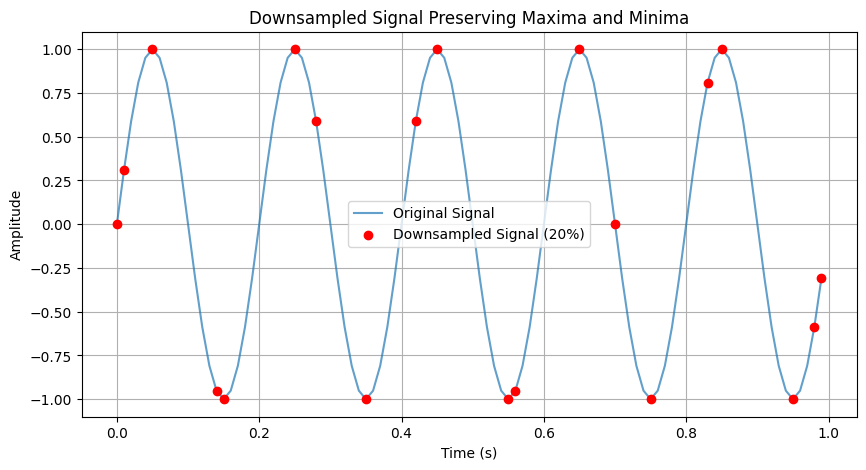

In [3]:
sampling_interval = 0.01
frequency = 5
duration = 1
t = np.arange(0, duration, sampling_interval)
signal = np.sin(2 * np.pi * frequency * t)

downsampled_signal, downsampled_time = downsample_signal(signal)

# Compare lengths
print("Original signal length:", len(signal))
print("Downsampled signal length:", len(downsampled_signal))

# Check target ratio
original_length = len(signal)
downsampled_length = len(downsampled_signal)
target_ratio = 0.2
achieved_ratio = downsampled_length / original_length
print(f"Original Length: {original_length}")
print(f"Downsampled Length: {downsampled_length}")
print(f"Target Ratio: {target_ratio}, Achieved Ratio: {achieved_ratio:.2f}")

# Verify all maxima and minima are present
extrema_indices_original = np.where((np.diff(np.sign(np.diff(signal))) != 0))[0] + 1
extrema_values_original = signal[extrema_indices_original]

# Check if extrema exist in the downsampled signal
extrema_present = all(value in downsampled_signal for value in extrema_values_original)
print(f"All extrema preserved: {extrema_present}")

# Plot the results
plt.figure(figsize=(10, 5))
plt.plot(t, signal, label="Original Signal", alpha=0.7)
plt.scatter(downsampled_time, downsampled_signal, color="red", label="Downsampled Signal (20%)", zorder=5)
plt.title("Downsampled Signal Preserving Maxima and Minima")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.legend()
plt.grid()
plt.show()


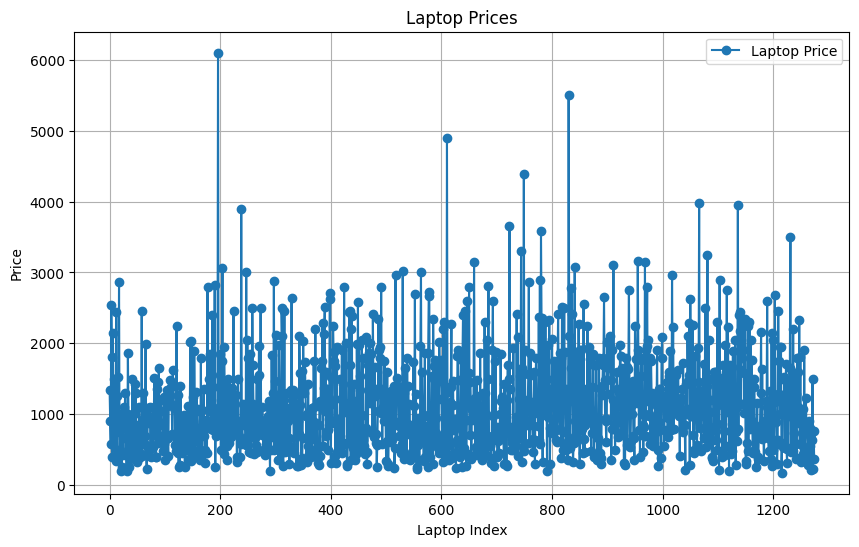

The company with the most expensive laptops on average is: Razer


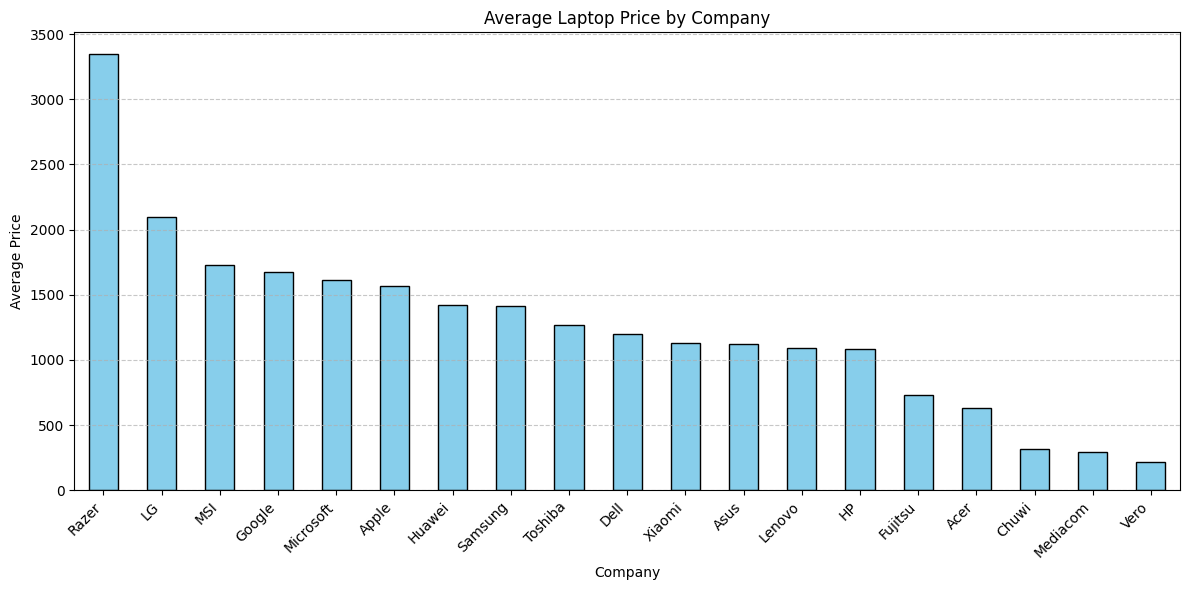

['Android' 'Chrome OS' 'Linux' 'Mac OS X' 'No OS' 'Windows 10'
 'Windows 10 S' 'Windows 7' 'macOS']
9


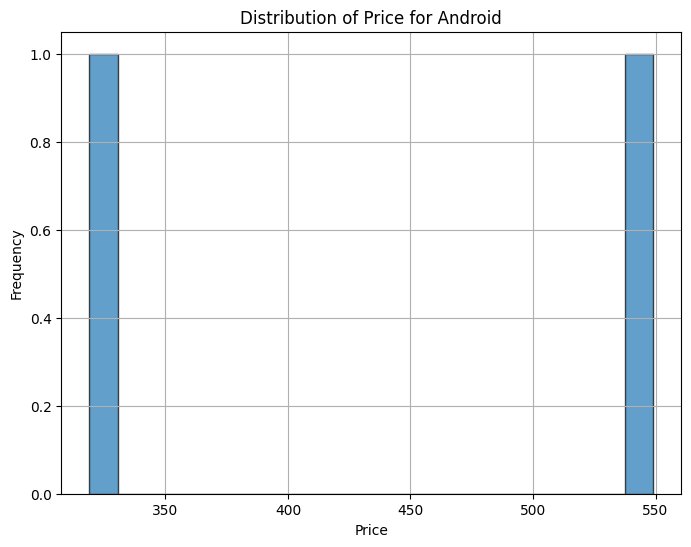

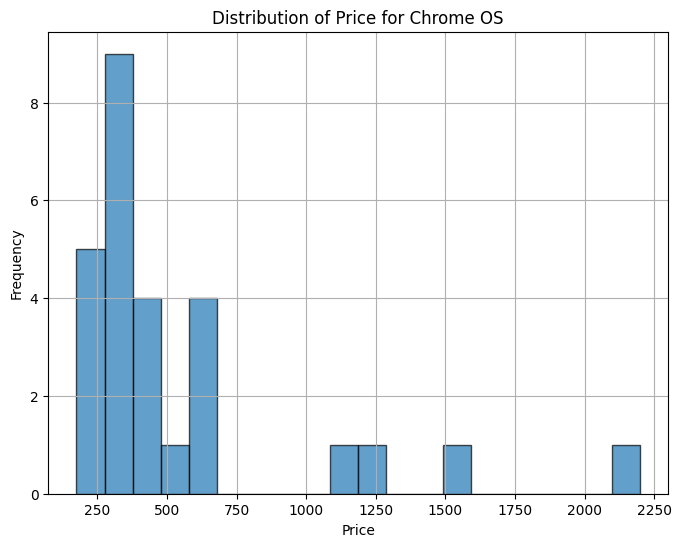

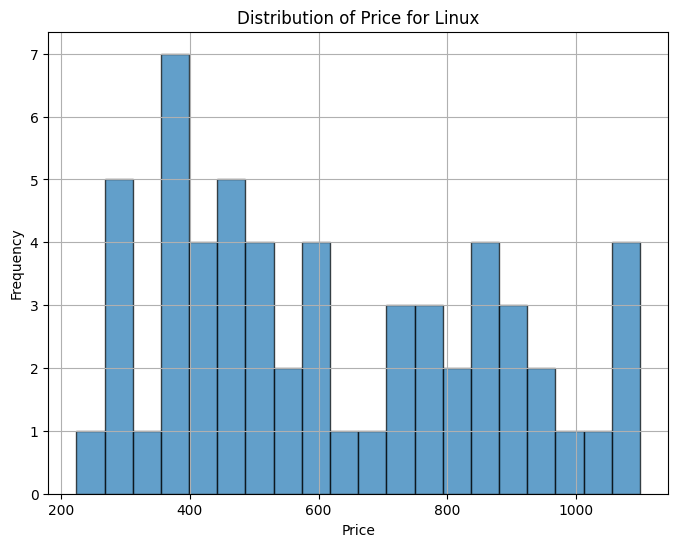

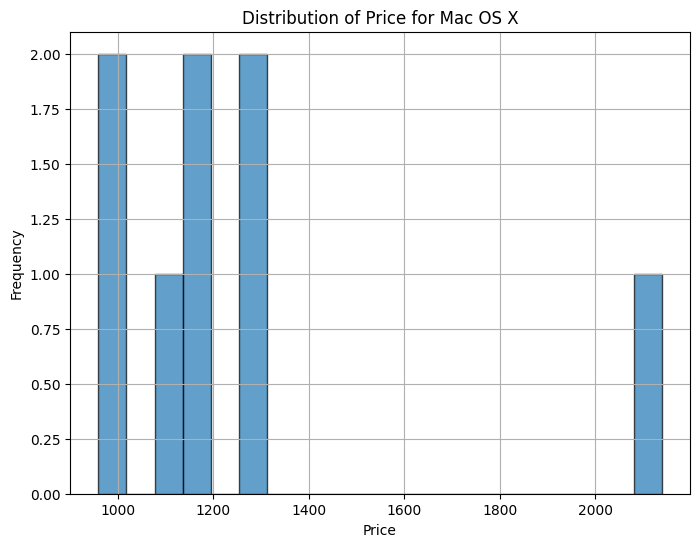

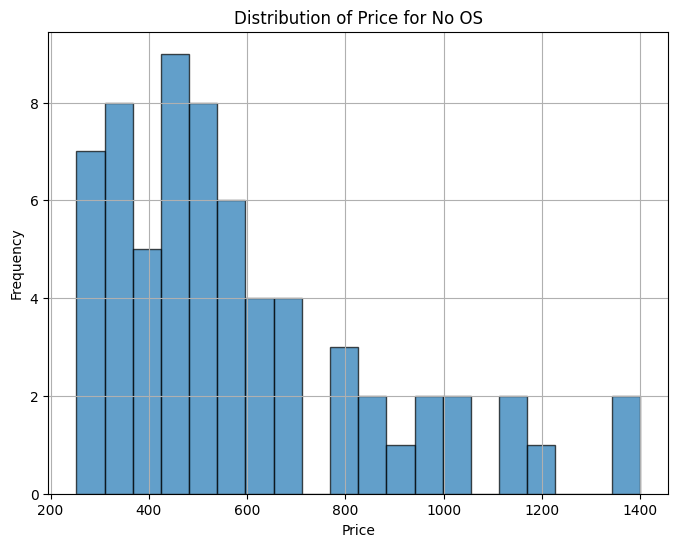

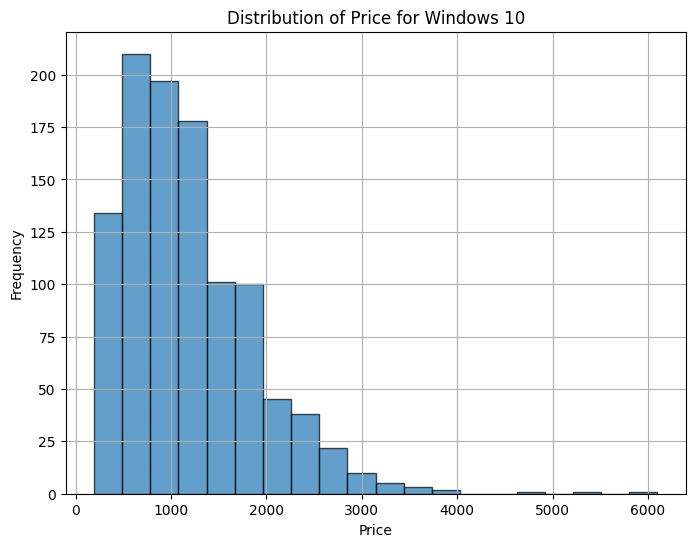

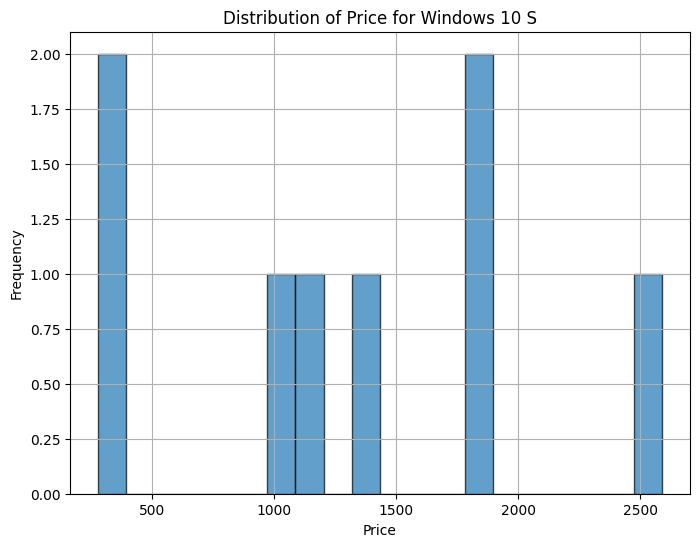

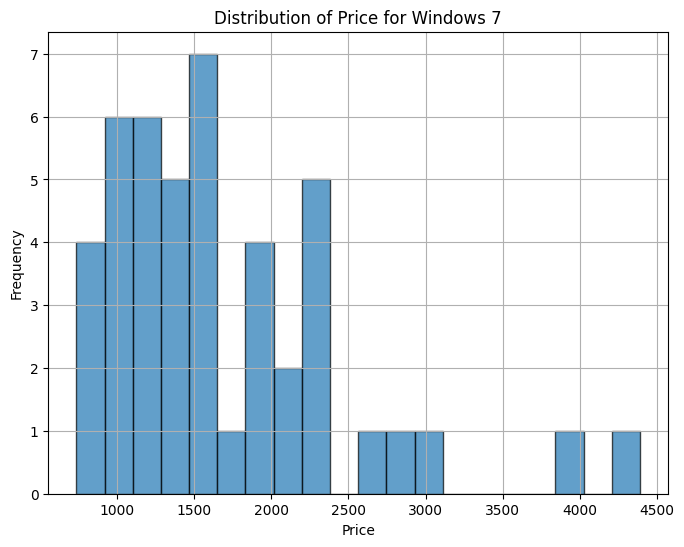

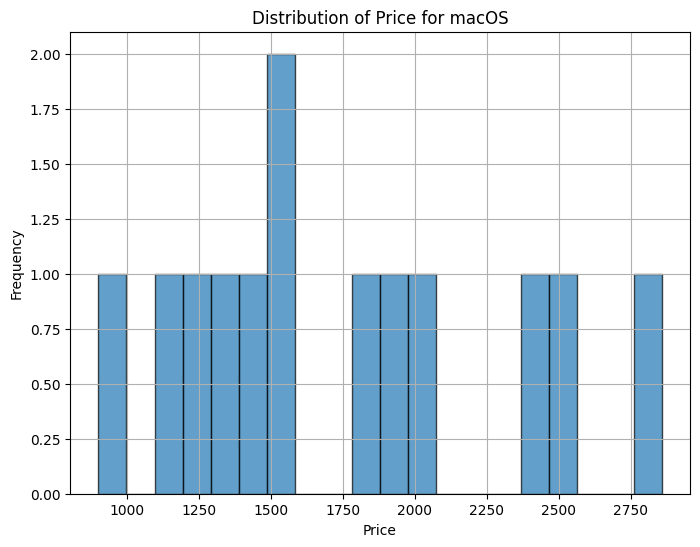

The relationship is that if we want more RAM the PRICE will usually be higher


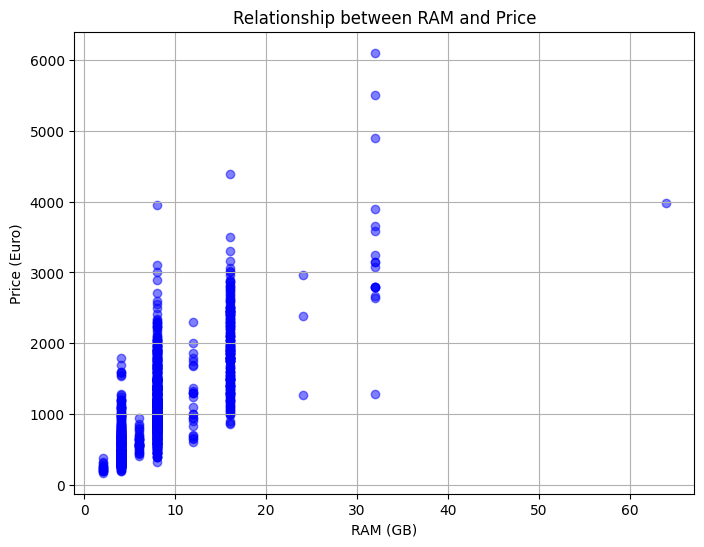

In [6]:
def plot_laptop_prices(file_path):
    # Load the dataset
    data = pd.read_csv(file_path)

    price_column = "Price (Euro)"

    # Plot the prices
    plt.figure(figsize=(10, 6))
    plt.plot(data[price_column].values, marker="o", linestyle="-", label="Laptop Price")
    plt.title("Laptop Prices")
    plt.xlabel("Laptop Index")
    plt.ylabel("Price")
    plt.legend()
    plt.grid(True)
    plt.show()


def analyze_average_laptop_price(file_path):
    data = pd.read_csv(file_path)

    company_column = "Company"
    price_column = "Price (Euro)"

    # Group by company and compute the average price
    average_prices = data.groupby(company_column)[price_column].mean()

    # Find the company with the most expensive laptops on average
    most_expensive_company = average_prices.idxmax()
    print(f"The company with the most expensive laptops on average is: {most_expensive_company}")

    # Plot the average laptop prices by company
    plt.figure(figsize=(12, 6))
    average_prices.sort_values(ascending=False).plot(kind="bar", color="skyblue", edgecolor="black")
    plt.title("Average Laptop Price by Company")
    plt.xlabel("Company")
    plt.ylabel("Average Price")
    plt.xticks(rotation=45, ha="right")
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.tight_layout()
    plt.show()

def find_different_os(file_path):
    # Load the dataset
    data = pd.read_csv(file_path)

    # initialize a set to hold the different os types in the file
    os_types = np.unique(np.array(data["OpSys"].values))

    print(os_types)
    print(len(os_types))


def distribute_price_per_os(file_path):
    # Load the dataset
    data = pd.read_csv(file_path)

    op_sys_groups = data.groupby("OpSys")

    # Create a plot for each 'OpSys' group
    for op_sys, group in op_sys_groups:
        plt.figure(figsize=(8, 6))
        plt.hist(group["Price (Euro)"], bins=20, edgecolor="black", alpha=0.7)
        plt.title(f"Distribution of Price for {op_sys}")
        plt.xlabel("Price")
        plt.ylabel("Frequency")
        plt.grid(True)
        plt.show()


def relationship_ram_price(file_path):
    data = pd.read_csv(file_path)

    print("The relationship is that if we want more RAM the PRICE will usually be higher")
    plt.figure(figsize=(8, 6))
    plt.scatter(data["RAM (GB)"], data["Price (Euro)"], alpha=0.5, color="blue")
    plt.title("Relationship between RAM and Price")
    plt.xlabel("RAM (GB)")
    plt.ylabel("Price (Euro)")
    plt.grid(True)
    plt.show()


def create_storage_type_column(file_path):
    data = pd.read_csv(file_path)

    # Split the values in 'Memory' by space and create a new column 'Storage type'
    arr = data["Memory"].apply(lambda x: " ".join(x.split(" ")[1:]) if isinstance(x, str) else '')
    # check if there is more than one memeory, if yes split by '+' and take the last value and combine the first and the last
    arr = arr.apply(lambda x: "+ ".join([x.split("+")[0], x.split("+")[-1].split(" ")[-1]]) if len(x.split("+")) > 1 else x)
    data['Storage type'] = arr

    # create a new file with the new column
    data.to_csv("laptop_price - dataset-modified.csv", index=False)




# Call the function with the provided file
file_path = "laptop_price - dataset.csv"
plot_laptop_prices(file_path)
analyze_average_laptop_price(file_path)
find_different_os(file_path)
distribute_price_per_os(file_path)
relationship_ram_price(file_path)
create_storage_type_column(file_path)